In [3]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import optuna as opta

In [2]:
pip install optuna

     -------------------------------------- 413.4/413.4 kB 1.4 MB/s eta 0:00:00
     ------------------------------------ 233.4/233.4 kB 621.7 kB/s eta 0:00:00
     ---------------------------------------- 78.6/78.6 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
#Uploding our dataset
df = pd.read_csv("C:/Users/Faith/Downloads/placement-dataset.csv", index_col=0)
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


0.9849948287010193 0.3173207938671112


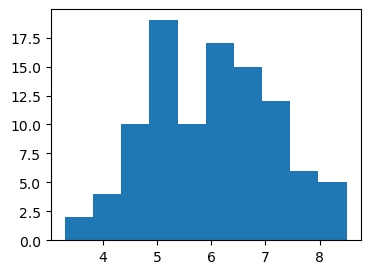

In [10]:
statistic, p_value = shapiro(df.cgpa)

print(statistic, p_value)
plt.figure(figsize=(4,3))
plt.hist(df.cgpa)

plt.show()

0.9866256713867188 0.4129476547241211


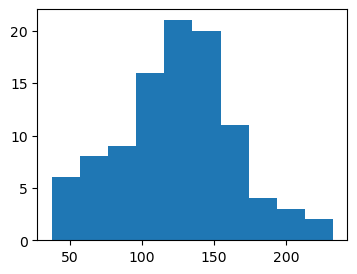

In [11]:
statistic, p_value = shapiro(df.iq)

print(statistic,p_value)
plt.figure(figsize=(4,3))
plt.hist(df.iq)
plt.show()

# Class Optuna, optimizer

In [12]:
class model_optimizer:
    def __init__(self, x_train,x_test,y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
    
    def objetive(self, trial):
        C = trial.suggest_float('c',0.01,10)
        kernel = trial.suggest_categorical('kernel',['linear','rbf','sigmoid'])
        gamma = trial.suggest_categorical('gamma',['scale','auto'])
        model = SVC(C=C,kernel=kernel, gamma=gamma)

        model.fit(self.x_train,self.y_train)

        return model.score(self.x_test, self.y_test)

Here an optuna process is used, which searches for the suitable or "best" hyperparameters for the SVC() model.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,['cgpa','iq']], df.placement,train_size=.8, random_state=223)
opta.logging.set_verbosity(optuna.logging.WARNING)
optimizer_hiper = model_optimizer(x_train, x_test, y_train, y_test)

studio = opta.create_study(direction='maximize')

studio.optimize(optimizer_hiper.objetive, n_trials=500)

print(f"Best_Params: {studio.best_params}")
    
print(f"Best_Score: {studio.best_value}")

C_Param = studio.best_params.get('c')
C_Param
kernel = studio.best_params.get('kernel')
gamma = studio.best_params.get('gamma')

Best_Params: {'c': 8.605567100334998, 'kernel': 'linear', 'gamma': 'auto'}
Best_Score: 1.0


In [14]:
pipline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC(C=C_Param, kernel= kernel,gamma=gamma))

])

modelo = pipline.fit(x_train, y_train)
print(accuracy_score(modelo.predict(x_train), y_train))
print(accuracy_score(modelo.predict(x_test), y_test))

0.9125
1.0


C:\Users\Faith\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


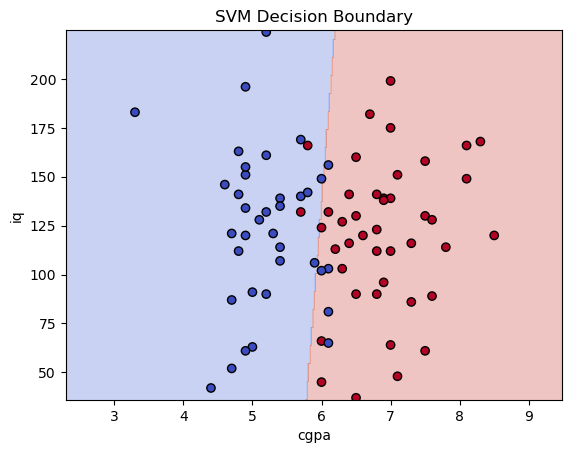

In [15]:
def plot_decision_boundary(X, y, model, scaler, title):
    h = .02  
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('cgpa')
    plt.ylabel('iq')
    plt.show()

plot_decision_boundary(x_train, y_train, modelo.named_steps['svc'], modelo.named_steps['scaler'], 'SVM Decision Boundary')

Colclusion:
The higher the cgpa the better the placement possibility.